In [1]:
import torch
from utils.aihub_kpop_dataset import KpopImageDatasetwT
from torch.utils.data import DataLoader
from model import PoseHRNet
model = PoseHRNet('w32', num_joints=29)

/Users/junghyun/miniforge3/envs/torch_cpu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mydataset = KpopImageDatasetwT()

In [3]:
mydataset.__len__()

3447

In [4]:
x, y = mydataset.__getitem__(0)

In [5]:
x.shape, y.shape

(torch.Size([3, 256, 256]), torch.Size([29, 64, 64]))

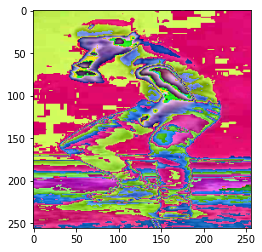

In [ ]:
from utils.plot import poseimage

my_img = poseimage(img=x, joints=y)
my_img.show_image_only()

In [ ]:
y[1].shape
sum = 0.0
max_v = 0
for y_y in y[0]:
    for y_x in y_y:
        if y_x > 0:
            sum += y_x
            max_v = max(y_x, max_v)
print(sum)
print(max_v * 6.28)

TypeError: iteration over a 0-d tensor

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device : {}'.format(device))

torch.device = 'cpu'

device : cpu


In [ ]:
from utils.loss_posehrnet import JointsMSELoss

myloss = torch.nn.MSELoss()
myoptimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 1 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(mydataloader, model, myloss, myoptimizer)
    test(mydataloader, model, myloss)
print("Done!")

Epoch 1
-------------------------------
loss: 28.892376  [    0/ 3447]
